In [2]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#loading dataset
df = pd.read_csv("C:/Users/pande/Desktop/insurance.csv")

In [4]:
df.head()
#lets have a look at our dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#lets see the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#object type means string or categorical values
#now check what all different categorical columns have in them
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
#sex column tells whether the person is male or female
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
#smoker column tells whether the person smokes or not
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [9]:
#region tells in which region of the country the person lives

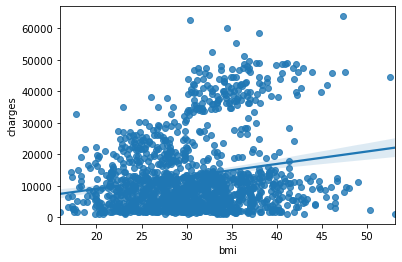

In [10]:
sns.regplot(x=df['bmi'],y=df['charges'])

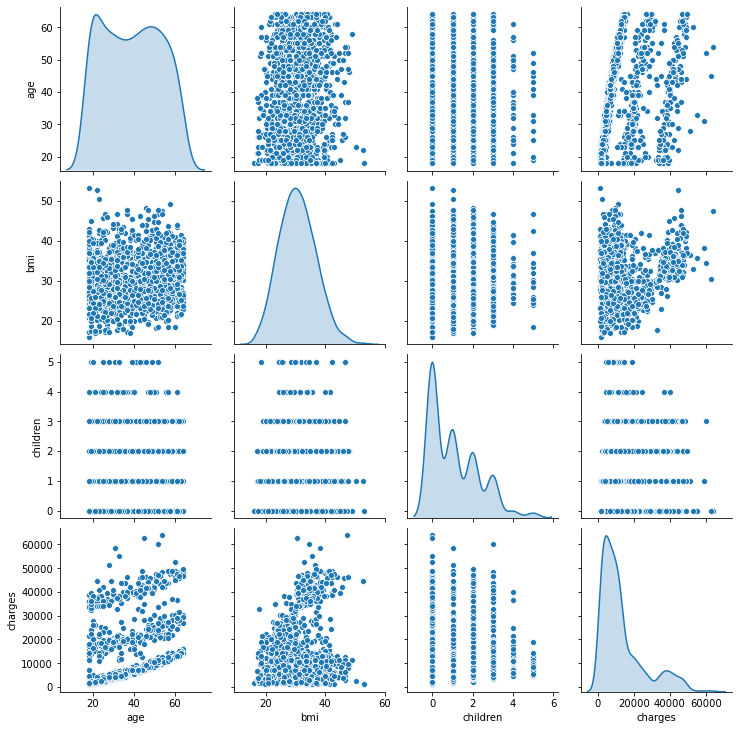

In [11]:
#this shows that bmi is a good predictor of the charges as bmi increase 
sns.pairplot(df,diag_kind="kde")

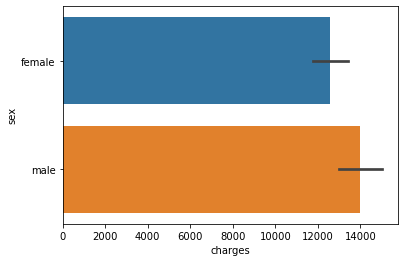

In [12]:
sns.barplot(x = df['charges'],y=df['sex'])

In [13]:
#the above plot also tells us that sex is good predictor of charges

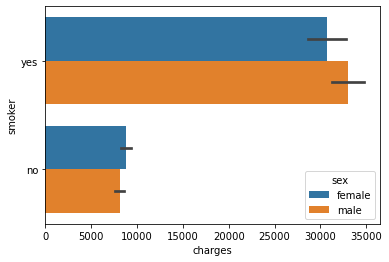

In [14]:
sns.barplot(x = df['charges'],y=df['smoker'],hue = df['sex'])

In [15]:
# the above bar plot show that people who smokes have a high charges so the smoker column will also be a good predictor  

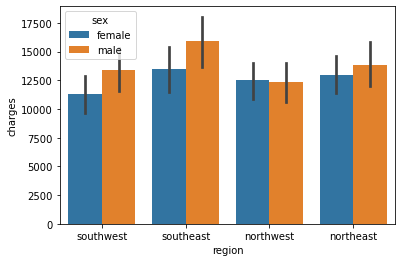

In [16]:
sns.barplot(x=df['region'],y=df['charges'],hue=df["sex"])

In [17]:
# the above graph shows that in each of the 4 regions in 3 regions males have highest charges 

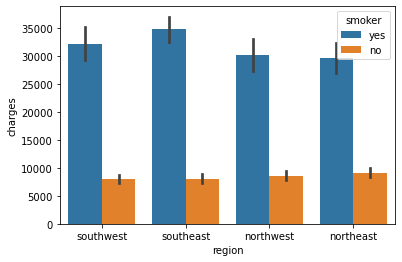

In [18]:
sns.barplot(x=df['region'],y=df['charges'],hue=df["smoker"])

In [19]:
#the above bar plot shows that people who smokes in all the four regions has higher charges of insurance than that of the peoples who don't smoke
#so in our data set we can clearly say that all the features have an impact on the target variable which is "charges"

In [20]:
#now its time to convert all the categorical values to continuous values by using encoding techniques
#one_hot_encoding is used as there is no preference or rank in case of sex column
sex = pd.get_dummies(df["sex"],drop_first=True)

In [21]:
#one_hot_encoding is used as there is no preference or rank in case of smoker column
smoker = pd.get_dummies(df["smoker"],drop_first=True)

In [22]:
#one_hot_encoding is used as there is no preference or rank in case of region column
region = pd.get_dummies(df["region"],drop_first=True)

In [23]:
#now remove the categorical columns and replace them with the newly created dummies 
df.drop(["sex",'smoker','region'],axis=1,inplace=True)

In [24]:
# now concatenate the newly created columns with the original dataset
df = pd.concat([df,sex,smoker,region],axis =1)

In [25]:
#lets now have a look at the new dataset 
df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [26]:
#now our data is ready to be used by our model

In [27]:
#now divide the features or columns on independent and dependent variables
X = df.drop("charges",axis=1)
y = df['charges']

In [28]:
X

,age,bmi,children,male,yes,northwest,southeast,southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [29]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
#spliting the data on test and train data

In [90]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_test)

In [92]:
model.score(X_train,y_train)

0.7417255854683333

In [93]:
model.score(X_test,y_test)

0.7835929767120724

In [94]:
model.predict([[19,27.900,0,0,1,0,0,1]])

array([25197.53106142])

In [95]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [96]:
y_pred1 = model1.predict(X_test)

In [97]:
model1.score(X_train,y_train)

0.7417255854683333

In [98]:
model1.score(X_test,y_test)

0.7835929767120724

In [99]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred2 = model1.predict(X_test)

In [101]:
model2.score(X_train,y_train)

0.7417255854683333

In [102]:
model2.score(X_test,y_test)

0.7835929767120724

In [103]:
#saving the model for furthur deployment
import pickle

pickle.dump(model1,open("model1.sav","wb"))